In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import pandas
import netCDF4
import glob
import cmocean
import scipy.ndimage

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

In [2]:
cmip_hist_fname = '/Users/baird/Dropbox/_data_analyzed/cmip5_calculations/pr/annual/ensemble/ensemble_36mods_pr_base_clim_1961-90_annual.nc'
cmip_rcp_fname = '/Users/baird/Dropbox/_data_analyzed/cmip5_calculations/pr/annual/ensemble/ensemble_36mods_pr_eoc_clim_2070-99_annual.nc'

In [3]:
gpcp_fname = '/Users/baird/Dropbox/_data_observations/GPCP/precip.mon.mean.nc'

In [4]:
pr_cmip_hist_ds = xarray.open_dataset(cmip_hist_fname)
pr_cmip_hist = pr_cmip_hist_ds['pr'].values
lat_cmip = pr_cmip_hist_ds['lat'].values
lon_cmip = pr_cmip_hist_ds['lon'].values

In [5]:
pr_cmip_rcp_ds = xarray.open_dataset(cmip_rcp_fname)
pr_cmip_rcp = pr_cmip_rcp_ds['pr'].values

In [6]:
gpcp_ds = xarray.open_dataset(gpcp_fname)
gpcp_time = gpcp_ds['time'].values
gpcp_precip = gpcp_ds['precip'].sel(time=slice('1961-01-01','1991-01-01')).values
gpcp_lat = gpcp_ds['lat'].values
gpcp_lon = gpcp_ds['lon'].values

gpcp_precip_mean = numpy.mean(gpcp_precip, axis=0)

plot mean end-of-century change and bias

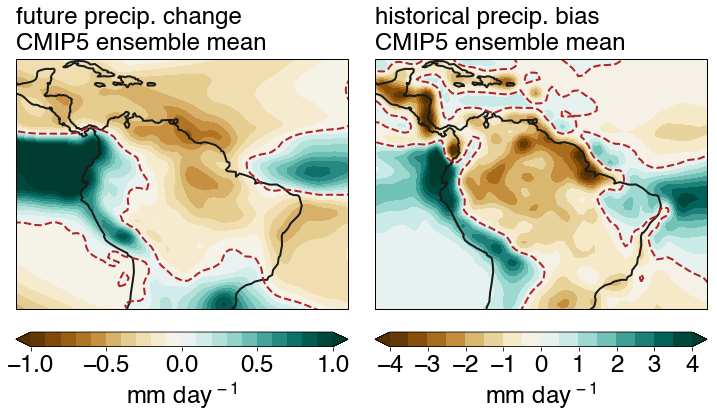

In [19]:
fontsize = 24

fig = mp.figure(figsize=(10,4.5))

map_proj = cartopy.crs.PlateCarree()

ax1 = fig.add_subplot(121, projection=map_proj)
ax2 = fig.add_subplot(122, projection=map_proj)

ax1.set_extent([265,335,-25,20])
ax2.set_extent([265,335,-25,20])

SMOOTH_FACTOR = 2.25

field = pr_cmip_rcp-pr_cmip_hist
xi_smooth = scipy.ndimage.zoom(lon_cmip,SMOOTH_FACTOR)
yi_smooth = scipy.ndimage.zoom(lat_cmip,SMOOTH_FACTOR)
field_smooth = scipy.ndimage.zoom(field,SMOOTH_FACTOR)

levels = numpy.arange(-1,1.1,0.1)
plot1 = ax1.contourf(xi_smooth, yi_smooth, field_smooth, \
                     levels=levels, \
                     #cmap=cmocean.cm.balance_r, \
                     cmap='BrBG', \
                     extend='both')
plotzero1 = ax1.contour(xi_smooth, yi_smooth, field_smooth, \
                     levels=[0], \
                     #cmap=cmocean.cm.balance_r, \
                     colors=['firebrick'], \
                     linewidths=[2], linestyles=['--'])

field = pr_cmip_hist-gpcp_precip_mean
xi_smooth = scipy.ndimage.zoom(lon_cmip,SMOOTH_FACTOR)
yi_smooth = scipy.ndimage.zoom(lat_cmip,SMOOTH_FACTOR)
field_smooth = scipy.ndimage.zoom(field,SMOOTH_FACTOR)

levels = numpy.arange(-4,4.1,0.5)
plot2 = ax2.contourf(xi_smooth, yi_smooth, field_smooth, \
                     levels=levels, \
                     #cmap=cmocean.cm.balance_r, \
                     cmap='BrBG', \
                     extend='both')
plotzero2 = ax2.contour(xi_smooth, yi_smooth, field_smooth, \
                     levels=[0], \
                     #cmap=cmocean.cm.balance_r, \
                     colors=['firebrick'], \
                     linewidths=[2], linestyles=['--'])

fig.tight_layout(w_pad=2)

ax1pos = ax1.get_position()
cbar_ax = fig.add_axes([ax1pos.x0, ax1pos.y0-0.035, ax1pos.width, 0.045])
cbar = fig.colorbar(plot1, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)
cbar.set_ticks([-1,-.5,-0,.5,1])

ax2pos = ax2.get_position()
cbar_ax = fig.add_axes([ax2pos.x0, ax2pos.y0-0.035, ax2pos.width, 0.045])
cbar = fig.colorbar(plot2, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

ax1.coastlines(lw=2, color='0.1')
ax2.coastlines(lw=2, color='0.1')

ax1.text(s='future precip. change\nCMIP5 ensemble mean', \
         x=0, y=1.02, ha='left', va='bottom', transform=ax1.transAxes, fontsize=fontsize)

ax2.text(s='historical precip. bias\nCMIP5 ensemble mean', \
         x=0, y=1.02, ha='left', va='bottom', transform=ax2.transAxes, fontsize=fontsize)

fig.savefig('../figures/POSTER_cmip5_eoc_change_and_hist_bias.pdf', bbox_inches='tight', transparent=True)